# week 3

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import optimize
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
# from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import arviz as az

import theano
import covid19pandas as cod
from country_codes import eurostat_dictionary
import eurostat
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

ModuleNotFoundError: No module named 'country_codes'

## ridge/lasso regressions

* Lasso regressions

what OLS does is choose the slope of the paramteters to minimize the squared errors.
The idea of lazzo regressions is that it changes the minimization problem , it's still (Y_i - beta_x^2) + a penalty term with lambda. On the penalty we want all our parameters to be 0. 


In [3]:
def loss_lasso (w,λ,X,y):
    loss = np.sum((np.dot(X,w)-y)**2)/len(y) + λ*np.sum(np.abs(w))
    return loss

we standarize the sum of squared errros by the number of observations we have (the lenght of y). If lambda is equal to zero we would have an ols.

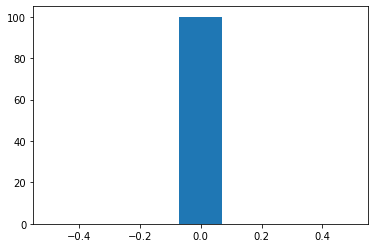

In [5]:
lasso_variables = []
penalty = 1.0
nobs = 100 #100 observations
for i in range(100): #repeat experiment 100 times
    X0=np.random.random((nobs,20)) #generated random random variables. IT's important to standarize the variables, rnaodm random generates numbers between 0 and 1. the matrix has 100 obs and 20 variables
    X =np.c_[np.ones((nobs,1)),X0] #add the constant. create a vector that consists just of 1
    beta = np.zeros(21) # the outcome should be that no variables are included in my model
    e = np.random.random(nobs) # Generate a noise term. Just a vector of errors, not a matrix
    y = np.dot(X,beta) + e
    results= optimize.minimize(lambda w: loss_lasso(w,penalty,X,y),np.zeros(X.shape[1])) # initial guess is that they are zero
    lasso_variables.append(np.sum(np.abs(results.x))) #if one of the coefficient is not zero, the sum would show it.
plt.hist(lasso_variables,bins=7);

All the coefficients are equal to 0. 

Program a lambda that is too high and shows that it's wrong what the lasso regressions does. 

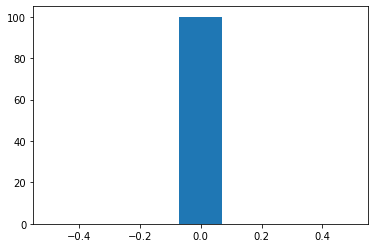

In [6]:
lasso_variables = []
penalty = 20.0
nobs = 100 #100 observations
for i in range(100): #repeat experiment 100 times
    X0=np.random.random((nobs,20)) #generated random random variables. IT's important to standarize the variables, rnaodm random generates numbers between 0 and 1. the matrix has 100 obs and 20 variables
    X =np.c_[np.ones((nobs,1)),X0] #add the constant. create a vector that consists just of 1
    beta[1] = 1.0 # set the second beta to 1
    e = np.random.random(nobs) # Generate a noise term. Just a vector of errors, not a matrix
    y = np.dot(X,beta) + e
    results= optimize.minimize(lambda w: loss_lasso(w,penalty,X,y),np.zeros(X.shape[1])) # initial guess is that they are zero
    lasso_variables.append(np.sum(np.abs(results.x))) #if one of the coefficient is not zero, the sum would show it.
plt.hist(lasso_variables,bins=7);

There are important causal relationship between the variabels that are droped out in the ridge or lasso regression. 
Lambda is a hyperparameter: it affects your model but is not estimate. You have to choose it wisely, you set it and it will have an effect on the outcome.
We split up the data into a training and a test set. We estimate in the training set.
A lasso regression never gives you the betas you are interested in. The lasso step only functions in selection your variables. You then use the variables in a normal regression without a penalty term. 

In [7]:
x = np.arange(6).reshape(2,3)
x

array([[0, 1, 2],
       [3, 4, 5]])

if I want to add a column 1,1

In [8]:
np.c_[np.ones(2),x]

array([[1., 0., 1., 2.],
       [1., 3., 4., 5.]])

In [9]:
np.ones(2)

array([1., 1.])

* Ridge

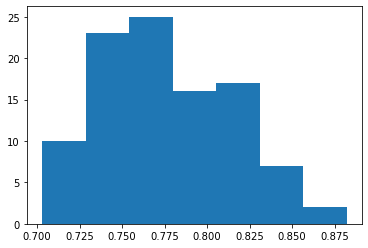

In [12]:
def loss_ridge (w,λ,X,y):
    loss = np.sum((np.dot(X,w)-y)**2)/len(y) + λ*np.sum(w**2)
    return loss

ridge_variables = []
penalty = 1.0
nobs = 100 #100 observations
for i in range(100): #repeat experiment 100 times
    X0=np.random.random((nobs,20)) #generated random random variables. IT's important to standarize the variables, rnaodm random generates numbers between 0 and 1. the matrix has 100 obs and 20 variables
    X =np.c_[np.ones((nobs,1)),X0] #add the constant. create a vector that consists just of 1
    beta = np.zeros(21) # the outcome should be that no variables are included in my model
    e = np.random.random(nobs) # Generate a noise term. Just a vector of errors, not a matrix
    y = np.dot(X,beta) + e
    results= optimize.minimize(lambda w: loss_ridge(w,penalty,X,y),np.zeros(X.shape[1])) # initial guess is that they are zero
    ridge_variables.append(np.sum(np.abs(results.x))) #if one of the coefficient is not zero, the sum would show it.
plt.hist(ridge_variables,bins=7);

## Causal reasoning

In [ ]:
* Fork

We have x and y. They are both affected by z. 

In [14]:
n = 100
z = np.random.normal(0,1,size=n)
x= 2*z + np.random.normal(0,1,size=n)
y= -1*z + np.random.normal(0,1,size=n)
data = pd.DataFrame({'x': x, 'y': y, 'z' : z})
data.head()

,x,y,z
0,-2.298771,-0.217575,-1.368554
1,0.983712,1.735317,0.251566
2,-0.889506,-0.716911,-0.368550
3,-0.549896,0.348785,-0.597165
4,-3.319556,1.364140,-1.699088


In [15]:
smf.ols('y ~ x', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     70.22
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           3.91e-13
Time:                        11:15:44   Log-Likelihood:                -156.82
No. Observations:                 100   AIC:                             317.6
Df Residuals:                      98   BIC:                             322.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0140      0.117      0.120      0.905      -0.219       0.247
x             -0.3919      0.047     -8.379      0.000      -0.485      -0.299
==============================================================================
Omnibus:                        9.856   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                3.599
Skew:                           0.078   Prob(JB):                        0.165
Kurtosis:                       2.084   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
smf.ols('y ~ x + z', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     65.98
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           8.14e-19
Time:                        11:17:28   Log-Likelihood:                -140.90
No. Observations:                 100   AIC:                             287.8
Df Residuals:                      97   BIC:                             295.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0041      0.101     -0.041      0.968      -0.204       0.196
x              0.1102      0.092      1.193      0.236      -0.073       0.294
z             -1.1998      0.199     -6.032      0.000      -1.595      -0.805
==============================================================================
Omnibus:                       13.102   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.047
Skew:                           0.009   Prob(JB):                        0.132
Kurtosis:                       2.015   Cond. No.                         5.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now x is insignificant

In [ ]:
* pipe

In [30]:
n = 100
x = np.random.normal(0,1,size=n) #x is now sort of the independent variable
z= 2*x + np.random.normal(0,1,size=n)
y= 3*z + np.random.normal(0,1,size=n)
data = pd.DataFrame({'x': x, 'y': y, 'z' : z})
data.head()

,x,y,z
0,0.528475,1.256494,0.137165
1,-1.180613,-5.336943,-2.265313
2,1.771646,2.122228,1.006434
3,1.373054,9.703692,2.842638
4,-1.923414,-22.091045,-6.692096


In [31]:
smf.ols('y ~ x + z', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2231.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           8.01e-82
Time:                        11:25:46   Log-Likelihood:                -143.78
No. Observations:                 100   AIC:                             293.6
Df Residuals:                      97   BIC:                             301.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0732      0.107      0.682      0.497      -0.140       0.286
x             -0.0880      0.248     -0.355      0.724      -0.581       0.405
z              3.0242      0.115     26.372      0.000       2.797       3.252
==============================================================================
Omnibus:                        1.863   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.850
Skew:                           0.264   Prob(JB):                        0.396
Kurtosis:                       2.594   Cond. No.                         6.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
smf.ols('y ~ x', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           5.15e-39
Time:                        11:25:50   Log-Likelihood:                -248.81
No. Observations:                 100   AIC:                             501.6
Df Residuals:                      98   BIC:                             506.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6354      0.295     -2.151      0.034      -1.222      -0.049
x              5.9407      0.275     21.582      0.000       5.394       6.487
==============================================================================
Omnibus:                        4.568   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                3.891
Skew:                          -0.440   Prob(JB):                        0.143
Kurtosis:                       3.400   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
* collider